# TN Med Helper Project
**TN Med Helper** is a fictional company whose mission is to ensure access to healthcare for all Tennesseans. TN Med Helper has approached your data science consultancy for help identifying communities in Tennessee that need the most help in expanding access to healthcare.

In this project, we will use the [Medicare Disparities](https://data.cms.gov/mapping-medicare-disparities) data as a starting point for identifying such communities. Specifically, you will be provided with datasets containing the percent of Medicare beneficiaries who had an annual wellness visit (annual_wellness.csv), the number of all-cause hospitilizations per 1000 beneficiaries (hospitalizations.csv), and the number of emergency department visits per 1000 beneficiaries (emergency_department.csv). Over the next 8 weeks, you will work towards addressing the following three objectives.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Objective 1
First, TN Med Helper is concerned about communities either lacking access to healthcare or losing access to healthcare. They are looking to expand telehealth technologies into the vulnerable communities, and need your help to priortize areas most needing attention. your first objective is to identify which counties in Tennessee have the most severe lack of access to healthcare (either due to lack of hospitals, physicians, or both). Once you have identified these counties, see if you can find any common demographic or economic characteristics for these areas.

### 1.1 Which counties in TN have the least access to physicians?

In [2]:
# Read in physicians dataset
physicians = pd.read_csv("../data/primary_care_physicians.csv")
physicians

,FIPS,state,county,primary_care_physicians
0,1001,Alabama,Autauga,26.0
1,1003,Alabama,Baldwin,153.0
2,1005,Alabama,Barbour,8.0
3,1007,Alabama,Bibb,12.0
4,1009,Alabama,Blount,12.0
...,...,...,...,...
3225,72151,Puerto Rico,Yabucoa,5.0
3226,72153,Puerto Rico,Yauco,43.0
3227,78010,US Virgin Islands,St. Croix,14.0
3228,78020,US Virgin Islands,St. John,1.0


In [3]:
# Filter for only TN counties
physicians = physicians.loc[(physicians['state'] == 'Tennessee')]

In [4]:
# Look at distribution of primary care physicians for the whole state
physicians['primary_care_physicians'].describe()

count     95.000000
mean      51.042105
std      129.311426
min        0.000000
25%        4.500000
50%       12.000000
75%       26.500000
max      806.000000
Name: primary_care_physicians, dtype: float64

In [5]:
# Load in county population dataset
population = pd.read_csv("../data/population_by_county.csv")
population

,FIPS,population,county,state,urban
0,17051,21565,Fayette County,ILLINOIS,Rural
1,17107,29003,Logan County,ILLINOIS,Rural
2,17165,23994,Saline County,ILLINOIS,Rural
3,17097,701473,Lake County,ILLINOIS,Urban
4,17127,14219,Massac County,ILLINOIS,Rural
...,...,...,...,...,...
3197,47033,14399,Crockett County,TENNESSEE,Rural
3198,47095,7401,Lake County,TENNESSEE,Rural
3199,47093,461104,Knox County,TENNESSEE,Urban
3200,53005,197518,Benton County,WASHINGTON,Urban


In [7]:
# Filter to only TN
population = population.loc[(population['state'] == 'TENNESSEE')]
population

,FIPS,population,county,state,urban
283,47165,183437,Sumner County,TENNESSEE,Urban
284,47169,10231,Trousdale County,TENNESSEE,Urban
285,47027,7654,Clay County,TENNESSEE,Rural
405,47157,936374,Shelby County,TENNESSEE,Urban
406,47077,27977,Henderson County,TENNESSEE,Rural
...,...,...,...,...,...
3195,47123,46064,Monroe County,TENNESSEE,Rural
3196,47079,32284,Henry County,TENNESSEE,Rural
3197,47033,14399,Crockett County,TENNESSEE,Rural
3198,47095,7401,Lake County,TENNESSEE,Rural


In [8]:
# Get rid of the " County" in the population dataset county name so that naming conventions are the same
population['county'] = population['county'].str.replace(' County', '')
population

<ipython-input-8-60322d77516a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['county'] = population['county'].str.replace(' County', '')


,FIPS,population,county,state,urban
283,47165,183437,Sumner,TENNESSEE,Urban
284,47169,10231,Trousdale,TENNESSEE,Urban
285,47027,7654,Clay,TENNESSEE,Rural
405,47157,936374,Shelby,TENNESSEE,Urban
406,47077,27977,Henderson,TENNESSEE,Rural
...,...,...,...,...,...
3195,47123,46064,Monroe,TENNESSEE,Rural
3196,47079,32284,Henry,TENNESSEE,Rural
3197,47033,14399,Crockett,TENNESSEE,Rural
3198,47095,7401,Lake,TENNESSEE,Rural


In [10]:
# Merge the two datasets 
physicians = pd.merge(left = physicians,
         right = population[['population', 'county', 'urban']])
physicians

,FIPS,state,county,primary_care_physicians,population,urban
0,47001,Tennessee,Anderson,39.0,76061,Urban
1,47003,Tennessee,Bedford,15.0,48292,Rural
2,47005,Tennessee,Benton,3.0,16140,Rural
3,47007,Tennessee,Bledsoe,1.0,14836,Rural
4,47009,Tennessee,Blount,90.0,129927,Urban
...,...,...,...,...,...,...
90,47181,Tennessee,Wayne,5.0,16693,Rural
91,47183,Tennessee,Weakley,18.0,33510,Rural
92,47185,Tennessee,White,9.0,26800,Rural
93,47187,Tennessee,Williamson,338.0,225389,Urban


In [11]:
# Create a new variable for #residents/physicians
physicians["residents_per_physician"] = physicians["population"] / physicians["primary_care_physicians"]
physicians

,FIPS,state,county,primary_care_physicians,population,urban,residents_per_physician
0,47001,Tennessee,Anderson,39.0,76061,Urban,1950.282051
1,47003,Tennessee,Bedford,15.0,48292,Rural,3219.466667
2,47005,Tennessee,Benton,3.0,16140,Rural,5380.000000
3,47007,Tennessee,Bledsoe,1.0,14836,Rural,14836.000000
4,47009,Tennessee,Blount,90.0,129927,Urban,1443.633333
...,...,...,...,...,...,...,...
90,47181,Tennessee,Wayne,5.0,16693,Rural,3338.600000
91,47183,Tennessee,Weakley,18.0,33510,Rural,1861.666667
92,47185,Tennessee,White,9.0,26800,Rural,2977.777778
93,47187,Tennessee,Williamson,338.0,225389,Urban,666.831361


In [12]:
# create a list of our conditions
conditions = [
    (physicians['residents_per_physician'] <= 1500),
    (physicians['residents_per_physician'] > 1500) & (physicians['residents_per_physician'] <= 3000),
    (physicians['residents_per_physician'] > 3000)
    ]

In [14]:
# create a list of the values we want to assign for each condition
values = ['adequate', 'mod inadequate', 'low inadequate']

In [17]:
# create a new column and use np.select to assign values to it using our lists as arguments
physicians['shadac'] = np.select(conditions, values)
physicians

,FIPS,state,county,primary_care_physicians,population,urban,residents_per_physician,shadac
0,47001,Tennessee,Anderson,39.0,76061,Urban,1950.282051,mod inadequate
1,47003,Tennessee,Bedford,15.0,48292,Rural,3219.466667,low inadequate
2,47005,Tennessee,Benton,3.0,16140,Rural,5380.000000,low inadequate
3,47007,Tennessee,Bledsoe,1.0,14836,Rural,14836.000000,low inadequate
4,47009,Tennessee,Blount,90.0,129927,Urban,1443.633333,adequate
...,...,...,...,...,...,...,...,...
90,47181,Tennessee,Wayne,5.0,16693,Rural,3338.600000,low inadequate
91,47183,Tennessee,Weakley,18.0,33510,Rural,1861.666667,mod inadequate
92,47185,Tennessee,White,9.0,26800,Rural,2977.777778,mod inadequate
93,47187,Tennessee,Williamson,338.0,225389,Urban,666.831361,adequate


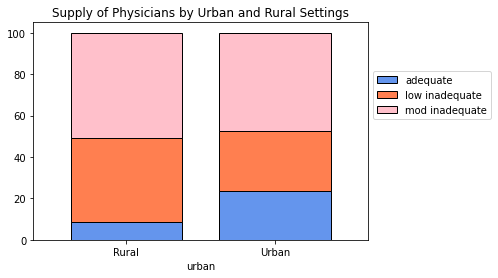

In [20]:
# Visualize SHADAC breakdown by rural and urban counties
(pd.crosstab(physicians['urban'], physicians['shadac'],  normalize = 'index') * 100).plot(kind = 'bar', 
                                                                                        stacked = True,
                                                                                        color = ['cornflowerblue', 'coral', 'pink'],
                                                                                        edgecolor = 'black',
                                                                                        width = 0.75,
                                                                                       )
plt.title('Supply of Physicians by Urban and Rural Settings')
plt.xticks(rotation = 0)
plt.legend(bbox_to_anchor = (1, 0.8), loc = 'upper left');

# Objective 2
Second, TN Med Helper is interested in reducing the number of potentially preventable hospitalizations. Do areas that lack access to healthcare tend to have higher rates of emergency department visits or hospitalizations? Is there an association between the percentage of beneficiaries who had an annual wellness visit and rate of hospitalizations or emergency department visits?

# Objective 3
Finally, TN Med Helper is trying to identify specific subpopulations to focus more attention on. Using data from [the Behavioral Risk Factor Surveillance System](https://www.cdc.gov/brfss/index.html), build a model to predict whether an individual has not had a checkup in the last year. Apply this model to the counties you identified above to predict how likely it is that the average person from those counties has not had a checkup in the last year. Which groups within these counties might need to be focused on to maximize the impact of TN Med Helper's efforts?